Author: Tahosina Monir Anonna
<br>    Department of CSE, RUET 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))

In [ ]:
data.shape

(768, 9)

In [ ]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
data.isnull().values.any()

False

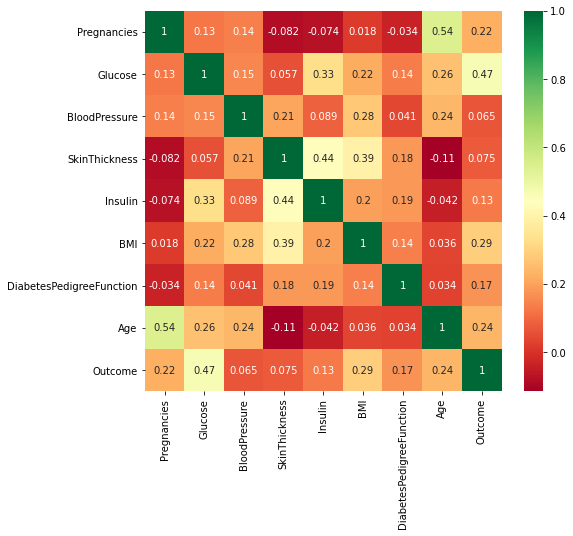

In [ ]:
##correlation among data
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (8,7))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
diabetes_map = {True: 1, False: 0}

In [ ]:
data['Outcome'] = data['Outcome'].map(diabetes_map)

In [ ]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_true_count = len(data.loc[data['Outcome'] == True])
diabetes_false_count = len(data.loc[data['Outcome'] == False])

In [ ]:
(diabetes_true_count,diabetes_false_count)

(268, 500)

In [ ]:
##train test split
from sklearn.model_selection import train_test_split
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',]
predicted_class = ['Outcome']

In [ ]:
X = data[feature_columns].values
y = data[predicted_class].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

In [ ]:
##checking missing/zero values
print("total rows: {0}".format(len(data)))
print("missing glucose: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("missing blood pressure: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("missing SkinThickness: {0}".format(len(data.loc[data['SkinThickness'] == 0])))
print("missing Insulin: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("missing BMI: {0}".format(len(data.loc[data['BMI'] == 0])))
print("missing DiabetesPedigreeFunction: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("missing Age: {0}".format(len(data.loc[data['Age'] == 0])))

total rows: 768
missing glucose: 5
missing blood pressure: 35
missing SkinThickness: 227
missing Insulin: 374
missing BMI: 11
missing DiabetesPedigreeFunction: 0
missing Age: 0


In [ ]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.2)


In [ ]:
from sklearn.impute import SimpleImputer 
import numpy as np
fill_values = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [ ]:
##algorithm

from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=10)

In [ ]:
predict_train_data = random_forest_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.749


In [ ]:
##hyper parameter optimization

params={
    "learning_rate" :[0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    "max_depth" : [3,4,5,6,8,10,12,15],
    "min_child_weight" : [1,3,5,7],
    "gamma" : [0.0, 0.1,0.2,0.3,0.4],
    "colsample_bytree" : [0.3,0.4,0.5,0.7]
}

In [ ]:
##hyper para optimization with randomizedsearchcv
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [ ]:
classifier=xgboost.XGBClassifier()

In [ ]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
def timer(start_time=None):
  if not start_time:
    start_time = datetime.now()
    return start_time
  elif start_time:
    thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
    tmin, tsec = divmod(temp_sec, 60)
    print('\n Time taken: %i hours %i minutes %s seconds.'%(thour,tmin,round(tsec,2)))

In [ ]:
from datetime import datetime
start_time= timer(None)
random_search.fit(X_train, y_train.ravel())
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 0 minutes 0.81 seconds.


In [ ]:
random_search.best_estimator_

XGBClassifier(colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=10,
              min_child_weight=7)

In [ ]:
classifier=xgboost.XGBClassifier(colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=10,
              min_child_weight=7)

In [ ]:
classifier.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


XGBClassifier(colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=10,
              min_child_weight=7)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm=confusion_matrix(y_test,y_pred)
score= accuracy_score(y_test,y_pred)

print(cm)
print(score)

[[128  16]
 [ 44  43]]
0.7402597402597403


In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_train,y_train.ravel(),cv=10)

In [ ]:
score

array([0.74074074, 0.83333333, 0.7962963 , 0.7962963 , 0.68518519,
       0.74074074, 0.87037037, 0.67924528, 0.81132075, 0.79245283])

In [ ]:
score.mean()

0.7745981830887491